# Image classification with TensorFlow Lite Model Maker

**Table of contents**<a id='toc0_'></a>    
- 1. [Prerequisites](#toc1_)    
- 2. [Simple End-to-End Example 簡單的端到端示例](#toc2_)    
  - 2.1. [Get the data path](#toc2_1_)    
  - 2.2. [Run the example 運行示例](#toc2_2_)    
  - 2.3. [Detailed Process 詳細流程](#toc2_3_)    
    - 2.3.1. [Step 1: Load Input Data Specific to an On-device ML App](#toc2_3_1_)    
    - 2.3.2. [Step 2: Customize the TensorFlow Model](#toc2_3_2_)    
    - 2.3.3. [Step 3: Evaluate the Customized Model](#toc2_3_3_)    
    - 2.3.4. [Step 4: Export to TensorFlow Lite Model](#toc2_3_4_)    
- 3. [Advanced Usage 高級用法](#toc3_)    
  - 3.1. [Customize Post-training quantization on the TensorFLow Lite model](#toc3_1_)    
  - 3.2. [Change the model](#toc3_2_)    
    - 3.2.1. [Change to the model that's supported in this library.](#toc3_2_1_)    
    - 3.2.2. [Change to the model in TensorFlow Hub](#toc3_2_2_)    
    - 3.2.3. [Change your own custom model](#toc3_2_3_)    
- 4. [Change the training hyperparameters](#toc4_)    
- 5. [Read more](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

The [TensorFlow Lite Model Maker library](https://www.tensorflow.org/lite/models/modify/model_maker) simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

TensorFlow Lite Model Maker庫簡化了為設備上ML應用程式部署TensorFlow神經網絡模型時將該模型適配和轉換為特定輸入數據的過程。

<br>

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

本筆記本顯示了一個端到端的示例，該示例利用此Model Maker庫來說明常用圖像分類模型的適配和轉換，以在移動終端上對花朵進行分類。

<br>

## 1. <a id='toc1_'></a>[Prerequisites](#toc0_)
To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

要運行此示例，我們首先需要安裝幾個必需的包，包括GitHub repo中的Model Maker包。

```
$ sudo apt -y install libportaudio2
$ pip install -q tflite-model-maker
```

In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/home/cosmo/anaconda3/envs/TensorFlow_2.8.3__Python_3.9/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/cosmo/anaconda3/envs/TensorFlow_2.8.3__Python_3.9/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.3 and is not supported. 
Some things might work, some things might not.


## 2. <a id='toc2_'></a>[Simple End-to-End Example 簡單的端到端示例](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Get the data path](#toc0_)
Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

讓我們使用一些圖像來處理這個簡單的端到端示例。數百張圖像是Model Maker的良好開端，而更多的數據可以實現更好的準確性。

In [2]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

### 2.2. <a id='toc2_2_'></a>[Run the example 運行示例](#toc0_)
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.

該示例僅由如下所示的4行代碼組成，每行代碼代表整個過程的一個步驟。

<br>

Step 1. Load input data specific to an on-device ML app. Split it into training data and testing data.

步驟1.加載特定於設備上ML應用的輸入數據。將其分為訓練數據和測試數據。

In [3]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

2023-06-30 14:50:23.079004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.079116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.093511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.093622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.093684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


2023-06-30 14:50:23.094358: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 14:50:23.193154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.193267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:50:23.193333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Step 2. Customize the TensorFlow model.

步驟2.自定義TensorFlow模型。

In [4]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


2023-06-30 14:51:04.059007: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


  7/103 [=>............................] - ETA: 0s - loss: 1.6133 - accuracy: 0.2991  

2023-06-30 14:51:04.403087: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-30 14:51:04.523737: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


103/103 [==============================] - 3s 9ms/step - loss: 0.8450 - accuracy: 0.7773
Epoch 2/5
103/103 [==============================] - 1s 9ms/step - loss: 0.6469 - accuracy: 0.8984
Epoch 3/5
103/103 [==============================] - 1s 9ms/step - loss: 0.6182 - accuracy: 0.9160
Epoch 4/5
103/103 [==============================] - 1s 9ms/step - loss: 0.5956 - accuracy: 0.9290
Epoch 5/5
103/103 [==============================] - 1s 9ms/step - loss: 0.5787 - accuracy: 0.9399


Step 3. Evaluate the model.

第三步。評估模型。

In [5]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 1s 15ms/step - loss: 0.6418 - accuracy: 0.9101


Step 4. Export to TensorFlow Lite model.

第四步。導出到TensorFlow Lite模型。

<br>

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/models/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

在這裡，我們使用元數據導出TensorFlow Lite模型，元數據為模型描述提供了標準。標籤文件嵌入在元數據中。默認的訓練後量化技術是用於圖像分類任務的全整數量化。

<br>

You could download it in the left sidebar same as the uploading part for your own use.

您可以在左側邊欄下載它，就像上傳部分一樣，供您自己使用。

In [6]:
model.export(export_dir='.')

2023-06-30 14:54:49.377942: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp8du9aqtm/assets


INFO:tensorflow:Assets written to: /tmp/tmp8du9aqtm/assets
2023-06-30 14:54:50.873651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:54:50.873812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:54:50.873858: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2023-06-30 14:54:50.873908: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-06-30 14:54:50.874183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 14:54:50.874256: I t

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpo58w6t7m/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpo58w6t7m/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

在這簡單的4個步驟之後，我們可以在設備上的應用程式中進一步使用TensorFlow Lite模型文件，例如在圖像分類參考應用程式中。

### 2.3. <a id='toc2_3_'></a>[Detailed Process 詳細流程](#toc0_)

Currently, we support several models such as EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.

目前，我們支持多種模型，如EfficientNet-Lite* 模型，MobileNetV 2，ResNet 50作為圖像分類的預訓練模型。但是，只需幾行代碼就可以將新的預訓練模型添加到這個庫中，這是非常靈活的。

<br>

The following walks through this end-to-end example step by step to show more detail.

下面將逐步居間此端到端示例，以顯示更多詳細信息。

#### 2.3.1. <a id='toc2_3_1_'></a>[Step 1: Load Input Data Specific to an On-device ML App](#toc0_)

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

花數據集包含3670個圖像，屬於5類。下載數據集的存檔版本並解壓縮它。

<br>

The dataset has the following directory structure:

數據集具有以下目錄結構：
```
flower_photos
|__ daisy
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ dandelion
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ roses
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ sunflowers
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ tulips
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
```

In [7]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use DataLoader class to load data.

使用 DataLoader 類加載數據。

<br>

As for from_folder() method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

至於 from_folder() 方法，它可以從文件夾中加載數據。它假定同一類的圖像數據位於同一子目錄中，並且子文件夾名稱是類名。目前，支持JPEG編碼圖像和PNG編碼圖像。

In [9]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

將其分為訓練數據（80%），驗證數據（10%，可選）和測試數據（10%）。

In [10]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

顯示25個帶標籤的圖像示例。

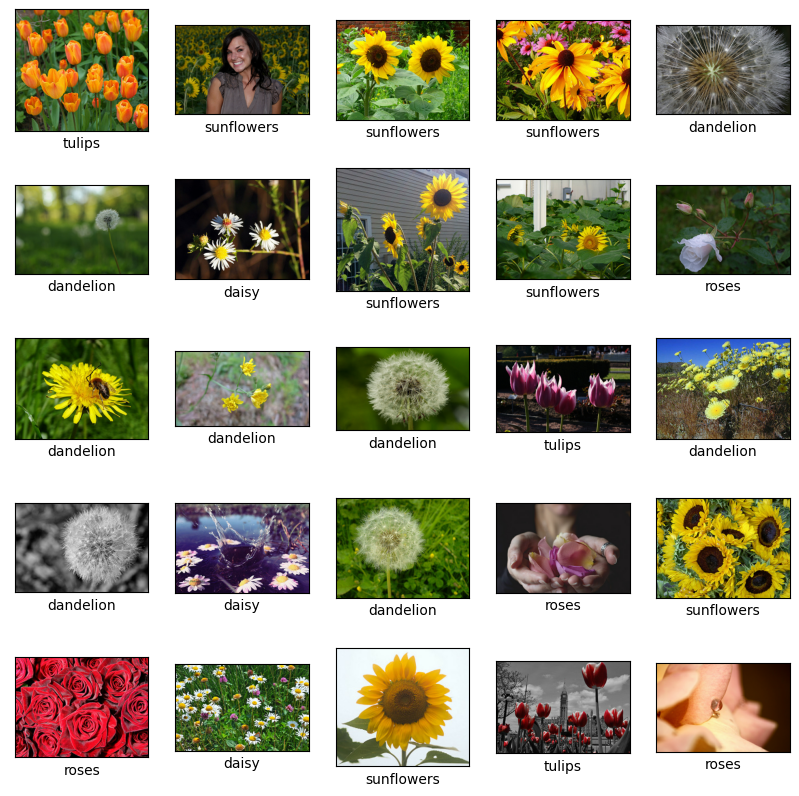

In [22]:
plt.figure(figsize=(10,10))
for i , (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)
    plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

#### 2.3.2. <a id='toc2_3_2_'></a>[Step 2: Customize the TensorFlow Model](#toc0_)

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.

基於加載的數據創建自定義圖像分類器模型。默認模型為EfficientNet-Lite 0。

In [23]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 2s 14ms/step - loss: 0.8978 - accuracy: 0.7527 - val_loss: 0.6757 - val_accuracy: 0.8719
Epoch 2/5
91/91 [==============================] - 1s 13ms/step - loss: 0.6570 - accuracy: 0.

Have a look at the detailed model structure.

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


#### 2.3.3. <a id='toc2_3_3_'></a>[Step 3: Evaluate the Customized Model](#toc0_)

In [25]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 0s 9ms/step - loss: 0.6074 - accuracy: 0.9128


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

我們可以在100張測試圖像中繪製預測結果。紅色的預測標籤是錯誤的預測結果，而其他是正確的。

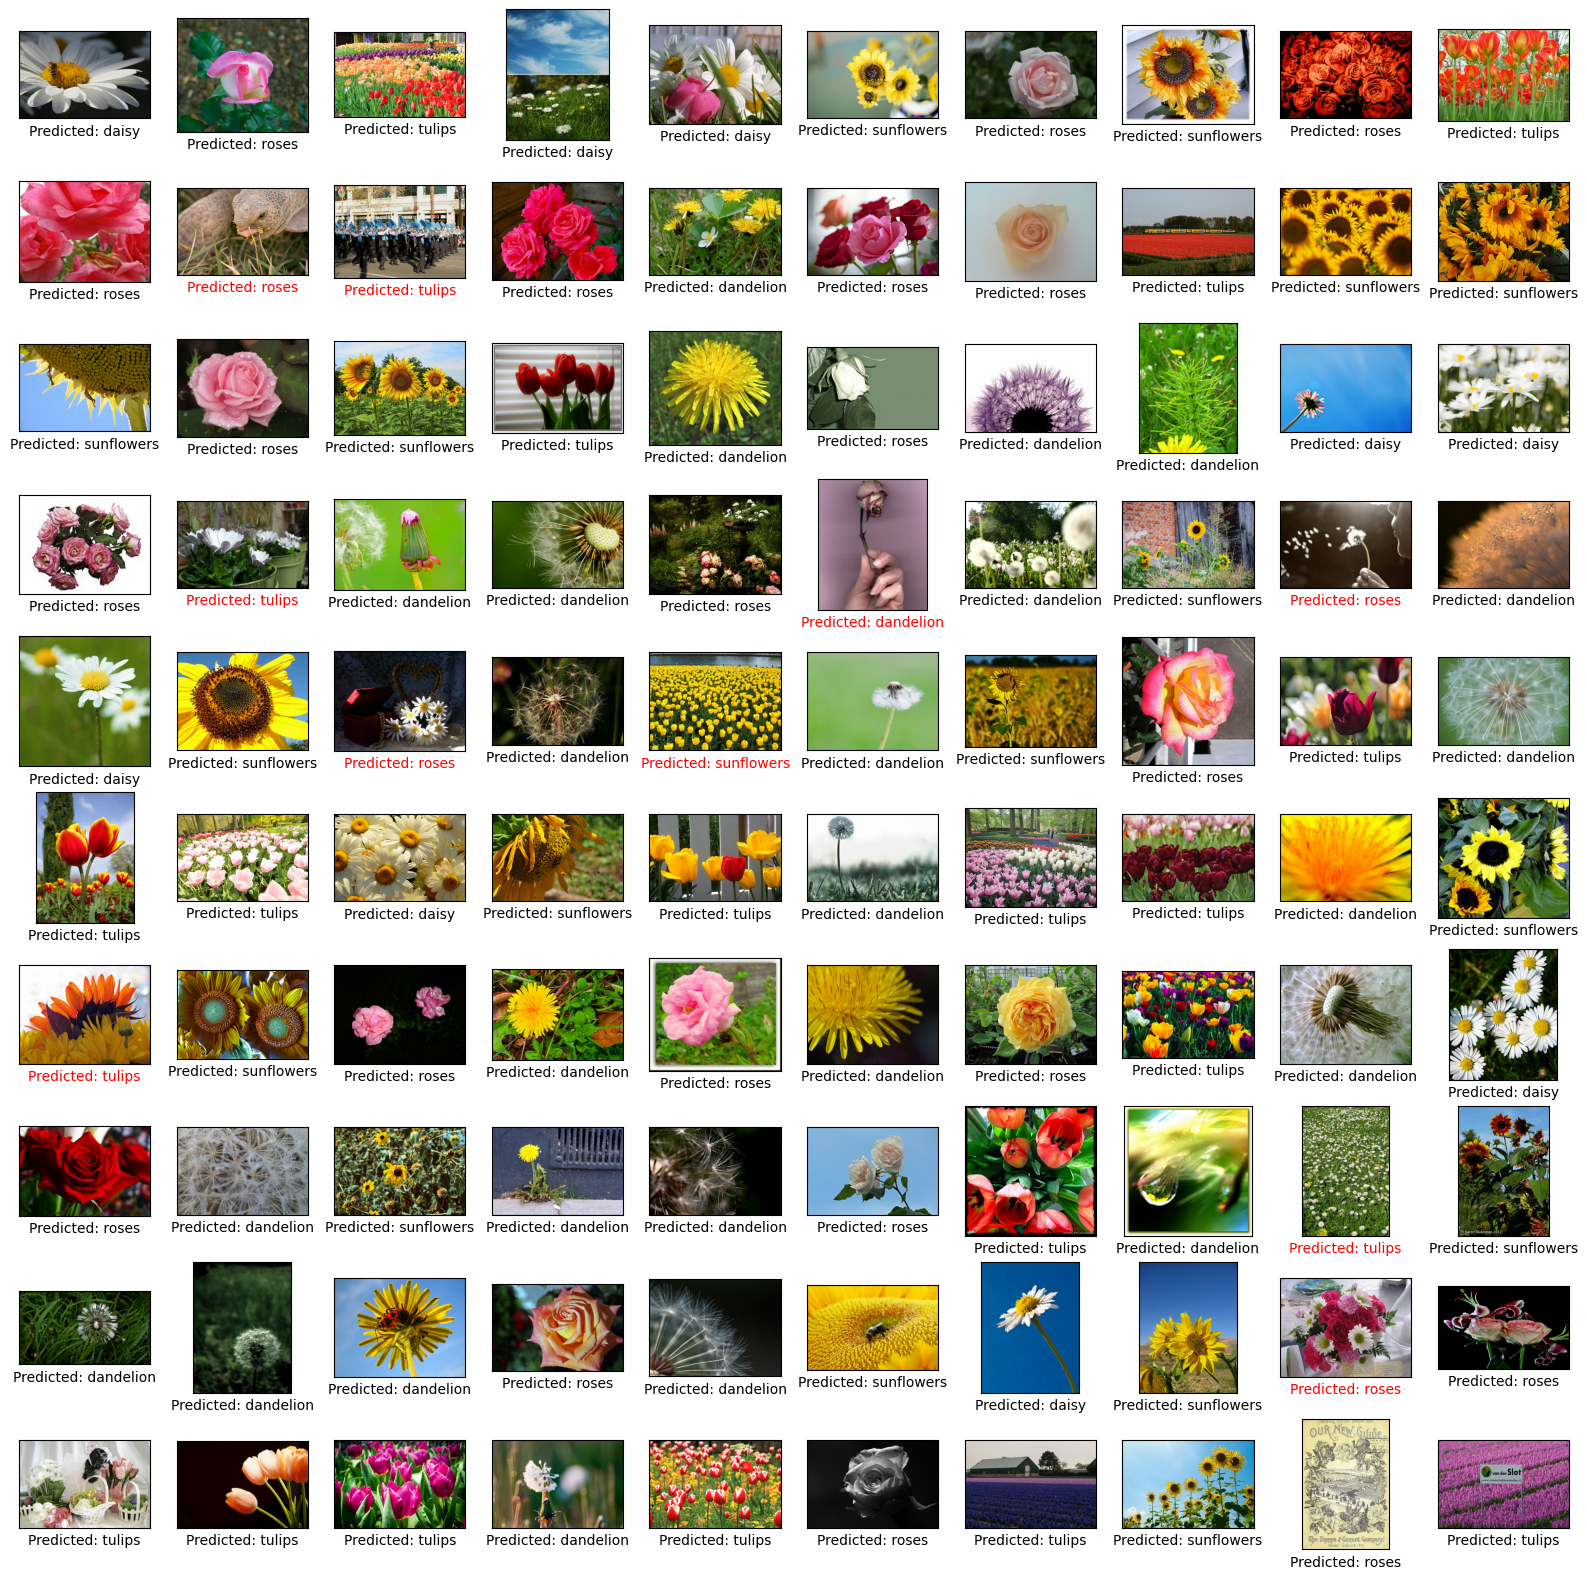

In [26]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to Advanced Usage to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

如果準確度不符合應用程式的要求，可以參考高級用法來探索替代方案，例如更改為更大的模型，調整重新訓練參數等。

#### 2.3.4. <a id='toc2_3_4_'></a>[Step 4: Export to TensorFlow Lite Model](#toc0_)

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/models/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

將訓練好的模型轉換為包含元數據的TensorFlow Lite模型格式，以便您以後可以在設備上的ML應用程式中使用。標籤文件和詞彙表文件嵌入在元數據中。默認的TFLite文件名為 `model.tflite` 。

<br>

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster. The default post-training quantization technique is full integer quantization for the image classification task.

在許多設備上ML應用中，模型大小是一個重要因素。因此，建議您應用量化模型，使其更小，並可能運行得更快。默認的訓練後量化技術是用於圖像分類任務的全整數量化。

In [27]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpk31bnso6/assets


INFO:tensorflow:Assets written to: /tmp/tmpk31bnso6/assets
2023-06-30 15:22:24.639964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:22:24.640123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:22:24.640168: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2023-06-30 15:22:24.640220: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-06-30 15:22:24.640507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:22:24.640579: I t

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpjlsr4hfa/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpjlsr4hfa/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


See the image classification [examples guide](https://www.tensorflow.org/lite/examples/image_classification/overview) for more details about how to integrate the TensorFlow Lite model into mobile apps.

有關如何將TensorFlow Lite模型集成到移動的應用程式中的更多詳細信息，請參閱圖像分類示例指南。

<br>

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

該模型可以使用TensorFlow Lite任務庫的ImageClassifier API集成到Android或iOS應用程式中。

The allowed export formats can be one or a list of the following:
* [ExportFormat.TFLITE](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/audio_classifier/AudioClassifier#DEFAULT_EXPORT_FORMAT)
* [ExportFormat.LABEL](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/ExportFormat#LABEL)
* [ExportFormat.SAVED_MODEL](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/ExportFormat#SAVED_MODEL)

<br>

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

默認情況下，它只導出包含元數據的TensorFlow Lite模型。您也可以選擇性地導出不同的文件。例如，僅導出標籤文件，如下所示：


In [31]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

也可以使用方法評估tflite模型 `evaluate_tflite` 。

In [30]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.9128065395095368}

## 3. <a id='toc3_'></a>[Advanced Usage 高級用法](#toc0_)

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

函數 `create` 是這個庫的關鍵部分。它使用遷移學習和類似於教程的預訓練模型。

<br>

The `create` function contains the following steps:

該 `create` 函數包含以下步驟：

1. Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are 0.1 and 0.1.

2. Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is EfficientNet-Lite0.

3. Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default dropout_rate value from make_image_classifier_lib by TensorFlow Hub.

4. Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size. EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.

5. Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.

### 3.1. <a id='toc3_1_'></a>[Customize Post-training quantization on the TensorFLow Lite model](#toc0_)

[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.

Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [32]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [33]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmptwb6nrkd/assets


INFO:tensorflow:Assets written to: /tmp/tmptwb6nrkd/assets
2023-06-30 15:54:50.309864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:54:50.310026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:54:50.310070: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2023-06-30 15:54:50.310123: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-06-30 15:54:50.310424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-30 15:54:50.310502: I t

INFO:tensorflow:Label file is inside the TFLite model with metadata.


2023-06-30 15:54:50.596841: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-30 15:54:50.596866: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp0lx76jae/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp0lx76jae/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

### 3.2. <a id='toc3_2_'></a>[Change the model](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Change to the model that's supported in this library.](#toc0_)

This library supports EfficientNet-Lite models, MobileNetV2, ResNet50 by now. EfficientNet-Lite are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter model_spec to the MobileNetV2 model specification in create method.

In [34]:
model  = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'),validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             2257984   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 2s 14ms/step - loss: 0.9505 - accuracy: 0.7455 - val_loss: 0.7241 - val_accuracy: 0.8583
Epoch 2/5
91/91 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [35]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 0s 8ms/step - loss: 0.6449 - accuracy: 0.9046


#### 3.2.2. <a id='toc3_2_2_'></a>[Change to the model in TensorFlow Hub](#toc0_)

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of i[mage_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the `url` of the TensorFlow Hub model uri. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [36]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `method`, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

#### 3.2.3. <a id='toc3_2_3_'></a>[Change your own custom model](#toc0_)

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ModelSpec` object like the process above.

## 4. <a id='toc4_'></a>[Change the training hyperparameters](#toc0_)

We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:

* `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
* `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
* `batch_size`: number of samples to use in one training step. None by default.
* `validation_data`: Validation data. If None, skips validation process. None by default.
* `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
* `learning_rate`: Base learning rate. None by default.
* `momentum`: a Python float forwarded to the optimizer. Only used when use_hub_library is True. None by default.
* `shuffle`: Boolean, whether the data should be shuffled. False by default.
* `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
* `use_hub_library`: Boolean, use make_image_classifier_lib from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default.
* `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when use_hub_library is False. None by default.
* `model_dir`: Optional, the location of the model checkpoint files. Only used when use_hub_library is False. None by default.

Parameters which are None by default like epochs will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61) from TensorFlow Hub library or [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.

In [37]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
91/91 [==============================] - 2s 14ms/step - loss: 0.8938 - accuracy: 0.7517 - val_loss: 0.6653 - val_accuracy: 0.8965
Epoch 2/10
91/91 [==============================] - 1s 13ms/step - loss: 0.6636 - accuracy: 

Evaluate the newly retrained model with 10 training epochs.

In [38]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 0s 9ms/step - loss: 0.6019 - accuracy: 0.9319


## 5. <a id='toc5_'></a>[Read more](#toc0_)

You can read our [image classification](https://www.tensorflow.org/lite/examples/image_classification/overview) example to learn technical details. For more information, please refer to:

TensorFlow Lite Model Maker [guide](https://www.tensorflow.org/lite/models/modify/model_maker) and [API reference](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker).
Task Library: [ImageClassifier](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) for deployment.
The end-to-end reference apps: [Android](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android), [iOS](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/ios), and [Raspberry PI](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/raspberry_pi).